In [1]:
# level(n) is the least m such that n*m is one-free

maxleveltest = 100  # We know that every number < 200 has a 1-eliminating multiplier < 50 if it has any

function level(n, maxleveltest) 
   for i in 1:maxleveltest
        if occursin('1', string(i*n)) == false 
           return i
        end
    end
return "error"
end

# println("level(361)=", level(361, maxleveltest))
# println(level(361, maxleveltest) * 361, " contains no ones.")

# for i in 1:20
#     println("The first one-eliminating multiplier for ", i, " is ", level(i,maxleveltest), 
#         " and ", level(i,maxleveltest), " times ", i, " = ", i*level(i, maxleveltest) )
# end

level_array(n::Integer, maxleveltest) = [level(i, maxleveltest) for i in 1:n]
#println(level_array(20, maxleveltest))

    

level_array (generic function with 1 method)

In [2]:
#Crelle multiplier

function twos_number(n)  #returns the value of a string of n copies of the digit 2 in base ten (helper 
    # function for Crelle multiplier)
    if n==1
        return 2
    else
        return 2*big(10)^(n-1) + twos_number(n-1)  # 10^n does not work for n>22 so use "big"
    end
end

#twos_number(5)
    
function crelle_product(k::Integer)
    for i in 2:k+1     #i is the longer sequence
        for j in i-1:-1:1    #j is the shorter sequence. We go backwards to check smaller differences before larger
            #println("i= ",twos_number(i), " j= ", twos_number(j),  "mods = ", 
                #mod(twos_number(i),k), " and ", mod(twos_number(j),k))     
            if mod(twos_number(i),k)== mod(twos_number(j),k)
                return (twos_number(i)-twos_number(j))
            end
        end
    end    
end  
#println(crelle_product(3))

crelle_multiplier(k::Integer) = div(crelle_product(k),k)

function commas(num::Integer)   # Commas make it easier to read big numbers
    str = string(num)
    return replace(str, r"(?<=[0-9])(?=(?:[0-9]{3})+(?![0-9]))" => ",")
end

# for i in 1:20
#    println(commas(crelle_multiplier(i)), "   ", crelle_multiplier(i)*i)
# end

c_array(n::Integer) = ([commas(crelle_multiplier(i)) for i in 1:n])
raw_c_array(n::Integer) = [crelle_multiplier(i) for i in 1:n]  #c_array is string for easy viewing, but we need raw version to use findmax

# println(c_array(20))
# println(raw_c_array(20))

raw_c_array (generic function with 1 method)

In [3]:

# Crelle bound

c = 2+2/9 # coefficient for Crelle bound
c_bound(k) = (c*(1/k)*big(10)^k-2/k)




function r_c_bound(k) # round Crelle bound to fit table.  For some reason round 
    # method returns multiple digits for k=1 and k=20.
    if k== 1  
        return 20.2
    elseif k== 20  
        return 20.2
    else
        return round(c_bound(k), sigdigits =3)
    end
end

# for i in 1:25
#     println(r_c_bound(i))
# end


r_cb_array(n) =[r_c_bound(i) for i in 1:n]
# println(r_cb_array(25))

r_cb_array (generic function with 1 method)

In [4]:
# Make chart for paper
using DataFrames
using PrettyTables
dict(n) = Dict("Number"=>collect(1:n), "Crelle Bound"=>r_cb_array(n), "Crelle Multiplier"=>c_array(n), 
    "Least Multiplier"=>level_array(n,50))

df = DataFrame(dict(25))
select!(df,[4,3,2,1])
pretty_table(df, nosubheader=true)

open("multiplier_table.pdf", "w") do f
    pretty_table(f, df, nosubheader=true)
end


┌────────┬──────────────────┬─────────────────────────────┬──────────────┐
│ Number │ Least Multiplier │           Crelle Multiplier │ Crelle Bound │
├────────┼──────────────────┼─────────────────────────────┼──────────────┤
│      1 │                2 │                          20 │         20.2 │
│      2 │                1 │                          10 │        110.0 │
│      3 │                1 │                         740 │        740.0 │
│      4 │                1 │                           5 │       5560.0 │
│      5 │                1 │                           4 │      44400.0 │
│      6 │                1 │                         370 │     370000.0 │
│      7 │                1 │                     317,460 │     3.17e+06 │
│      8 │                1 │                          25 │     2.78e+07 │
│      9 │                1 │                 246,913,580 │     2.47e+08 │
│     10 │                2 │                           2 │     2.22e+09 │
│     11 │               

In [5]:
# Example for paper
println("The crelle multiplier of 81 is ", float(crelle_multiplier(81)))
println("The crelle bound of 81 is ", c_bound(81))

The crelle multiplier of 81 is 2.743484224965706447187928669410150891632373113854595336076817558299039780521267e+79
The crelle bound of 81 is 2.74348422496570633344337153403103002347052097320556640625e+79


In [6]:
#Find all numbers between one and ten million of level greater than 48.  (There are two.)

@time begin
    maxexemplartest = 10000000
    maxleveltest =100
    
    for i in 1:maxexemplartest
        if level(i, maxleveltest) == "error"
            println("number ",i, "is of level greater than ", maxleveltest)
        elseif level(i, maxleveltest)>48
            println("number ",i, "is of level  ", level(i,maxleveltest))
        end
    end
end

number 4580102is of level  49
number 4580201is of level  49
  4.912047 seconds (122.98 M allocations: 4.753 GiB, 9.19% gc time, 0.62% compilation time)


In [7]:
# Check that the product above is ones-free
4580102*49 

224424998

In [8]:
# Find largest level for numbers up to one hundred million.
@time begin  #On my computer findmax(level_array(10^8,200)) takes about 30 seconds
   findmax(level_array(100000000,200))
end

 29.683249 seconds (523.47 M allocations: 24.146 GiB, 13.23% gc time)


(98, 22900501)

In [9]:
# find largest Crelle muliplier for numbers between 1 and 100
@time begin     
   maxCrelle, exemplar =findmax(raw_c_array(100))
   println("maxCrellpultiplier =", maxCrelle)
   println("exemplar = ", exemplar)
   println("float of Crelle multiplier = ", float(maxCrelle))
   println("Crelle product = ", maxCrelle*exemplar)
end

maxCrellpultiplier =22909507445589919816723940435280641466208476517754868270332187857961053837342497136311569301260
exemplar = 97
float of Crelle multiplier = 2.290950744558991981672394043528064146620847651775486827033218785796105383734257e+94
Crelle product = 2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222220
  2.212095 seconds (29.74 M allocations: 608.896 MiB, 14.49% gc time, 1.44% compilation time)


In [10]:
# find largest Crelle muliplier for numbers between 1 and 1000
@time begin     # On my computer findmax(raw_c_array(1000) takes just under five hours to compute.)
   maxCrelle, exemplar =findmax(raw_c_array(1000))
   println("maxCrellpultiplier =", maxCrelle)
   println("exemplar = ", exemplar)
   println("float of Crelle multiplier = ", float(maxCrelle))
   println("Crelle product = ", maxCrelle*exemplar)
end

maxCrellpultiplier =22606533288120266757092799819147733695037865943257601446818130439697072453939188425454956482423420368486492596360348140612637052108059229117214875098903583135526167062280999208771334915790663501752006329829320673674691985983949361365434610602464112128405109076523115180287102972759127387815078557703176217926980897479371538374590256584152820165027693003277947326777438679778455973776421385780490561772352209788628913756075505821182321690968689951395953430541426472250480388832372555668588221996156889341019554651294224030744885271843562789646207754040917825251497682830337967672657397988018537357296258618740816095851701141629931050073471233186390866960551599412230134508873064315587204702158923929015485475302362382728608567876116197581100938171131456991070419351192494630948344071436645190460042952413247428506838476319656380694020571945292189442748954447835424437662484458008364417316604498700124335933084661467164010399005312535322708262687916807957499717418333898496665536340

In [11]:
# minat(n:maxexemplartest) returns smallest number of level n if one smaller than maxexmplartest exits; otherwise returns "none" or "none less than maxexemplartest" 


function minat(n, maxexemplartest)
    if n % 10  == 0        # Since we know numbers ending in 0 are not levels, it saves time to say this now.
        return "none"
    else
       for i in 1:maxexemplartest
           if level(i,maxexemplartest) == n
               return i
           end
       end
    end
return "none less than maxexemplartest"
end

println("least exemplar of level 49 = ", minat(49,maxexemplartest))
println("least exemplar of level 59 = ", minat(59,maxexemplartest))


least exemplar of level 49 = 4580102
least exemplar of level 59 = none less than maxexemplartest


In [12]:
@time begin  #takes 3.5 hours with maxexemplartest at 10^10
    
   minat_array = [minat(i,10000000000) for i in 1:100]
   println(minat_array)
end

Any[2, 1, 81, 51, 531, 5421, 3157, 2571, 25517, "none", 25157, 20531, 26571, 143053, 15703, 130305, 140257, 125703, 105302, "none", 109027, 91027, 90271, 102053, 839031, 7701303, 7428017, 7142859, 701303, "none", 6516354, 6253014, 6253013, 5890103, 5780102, 5701027, 5420102, 540102, 530102, "none", 5010268, 5240103, 5130103, 4550102, 4570102, 5010269, 5026901, 43008018, 4580102, "none", 40050102, 39005301, 39008631, 38008513, 37007018, 36513007, 35131007, 35007013, 50251301, "none", 328007013, 40060201, 321006015, 32006013, 40050201, 303900501, 30200501, 30050102, 30050201, "none", 290050102, 277890051, 274006012, 270900501, 30134006, 26800501, 260050102, 30060134, 257700501, "none", 250050102, 244005301, 241005401, 239005301, 24005401, 232900501, 231004009, 227900501, 229100501, "none", 2200400915, 240060301, 220045801, 2130040501, 2110040084, 229900501, 210045801, 22900501, 210043008, "none"]
3253.009971 seconds (79.58 G allocations: 3.474 TiB, 13.97% gc time, 0.01% compilation time)

In [13]:
df = DataFrame(Level = 1:100, Least_Exemplar = minat_array)

,Level,Least_Exemplar
,Int64,Any
1,1,2
2,2,1
3,3,81
4,4,51
5,5,531
6,6,5421
7,7,3157
8,8,2571
9,9,25517


In [14]:
df1=@view(df[1:25, :])
df2=@view(df[26:50, :])
df3=@view(df[51:75, :])
df4=@view(df[76:100, :])

pretty_table(df1, nosubheader=true)
pretty_table(df2, nosubheader=true)
pretty_table(df3, nosubheader=true)
pretty_table(df4, nosubheader=true)


┌───────┬────────────────┐
│ Level │ Least_Exemplar │
├───────┼────────────────┤
│     1 │              2 │
│     2 │              1 │
│     3 │             81 │
│     4 │             51 │
│     5 │            531 │
│     6 │           5421 │
│     7 │           3157 │
│     8 │           2571 │
│     9 │          25517 │
│    10 │           none │
│    11 │          25157 │
│    12 │          20531 │
│    13 │          26571 │
│    14 │         143053 │
│    15 │          15703 │
│    16 │         130305 │
│    17 │         140257 │
│    18 │         125703 │
│    19 │         105302 │
│    20 │           none │
│    21 │         109027 │
│    22 │          91027 │
│    23 │          90271 │
│    24 │         102053 │
│    25 │         839031 │
└───────┴────────────────┘
┌───────┬────────────────┐
│ Level │ Least_Exemplar │
├───────┼────────────────┤
│    26 │        7701303 │
│    27 │        7428017 │
│    28 │        7142859 │
│    29 │         701303 │
│    30 │           none │
│

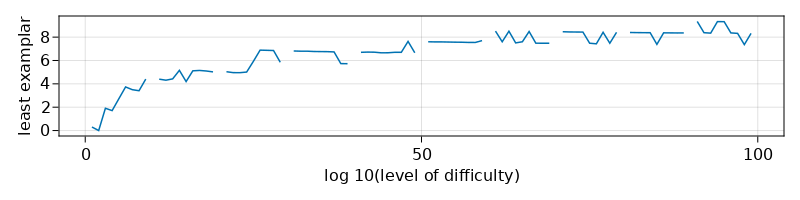

In [15]:
farray = replace(minat_array,"none"=>0) # convert minat_array to floats suitable for graphing
initfarray = farray[1:10]


y=convert(Array{Float64,1}, farray)
y=log10.(y)

using CairoMakie
figure = CairoMakie.Figure(resolution = (800, 200))
ax1 = figure[1, 1] = Axis(figure, xlabel = "log 10(level of difficulty)", ylabel = "least examplar", textsize = 12, title=" ")
x = 1:100
l1=lines!(ax1, x, y)
display(figure)
